In [2]:
#Importing packages needed
import scipy
from scipy import stats
from scipy import signal
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from datetime import datetime, timedelta
from numpy import absolute, sqrt, log
from textwrap import wrap
from IPython.display import Math, display
import sys
%matplotlib inline
%matplotlib nbagg

**QUESTION 1**

In [41]:
#First obtain the longitude and latitude 
long_latval = np.genfromtxt('JamesBay_temperature_2019.dat',delimiter=" ",max_rows=2)
long = long_latval[0][~np.isnan(long_latval[0])]
lat = long_latval[1][~np.isnan(long_latval[1])]
indices = list(zip(long,lat))
indices.insert(0,"time")

#Reading the required value
df = pd.read_csv('JamesBay_temperature_2019.dat',sep='\s+',skiprows=[0,1], names=indices, index_col = 'time')
df.head()

/opt/conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,734139.0
,737668.99931
time,
5083200.00,NaN
4.94,NaN
4.94,NaN
4.94,NaN
4.94,NaN


In [35]:
#Function I found on the internet for fixing the timestamp from Matlab's to Python's
def matlabpython_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days = 366)

df = pd.DataFrame()
df.index = [matlabpython_datetime(i) for i in df.index]
df.head()

""


In [43]:
jblong = 236.620 #Longitude of James Bay station
jblat = 48.417 #Latitude of James Bay station
jblongdiff = abs(longitudes - jblong) #Obtaining the difference between longitudes
jblatdiff = abs(lattitudes - jblat) #Obtaining the difference between latitudes

#This is the column number for the required data
stnum = list((jblongdiff+jblatdiff)).index(min(jblongdiff+jblatdiff))

df = df.iloc[:,stnum]

#First set of dates
firststart = pd.Timestamp(year=2015, month=11, day=1, hour=0)
firstend = pd.Timestamp(year=2016, month=3, day=15, hour=0)

#Second set of dates
secondstart = pd.Timestamp(year=2016, month=5, day=15, hour=0)
secondend = pd.Timestamp(year=2016, month=9, day=30, hour=0)

#To put timestamps on the two sets of dates
winter = df[(df.index>firststart) & (df.index<firstend)]
summer = df[(df.index>secondstart) & (df.index<secondend)]

In [ ]:
#Minute resolution data

timedata = np.genfromtxt('JamesBay_temperature_2019.dat', delimiter=" ", max_rows=3)
ti = timedata[0]
tf = timedata[1]
N = timeinfo[2]

increase = (ti-t0)/N
tt = np.arange(ti, tf, increase)

In [7]:
#Open temperature data and create a pandas dataframe with timestamps
dff = pd.read_csv('JamesBay_temperature_2019.dat', sep="\s+", skiprows=[0,1,2], names=['Temperature'])
dff.index = [matlabpython_datetime(i) for i in tt]
dff.index = [i - timedelta(hours = 7) for i in dff.index]

In [8]:
firstmin = dff[(dff.index>firststart) & (dff.index<firstend)]
secondmin = dff[(dff.index>secondstart) & (dff.index<secondend)]

firstmin = firstmin.fillna(method='ffill')
secondmin = secondmin.fillna(method='ffill')

firstmin = np.array([float(i) for i in firstmin.values])
secondmin = np.array([float(i) for i in secondmin.values])

In [9]:
#Winter data and using scipy.signal.welch with a Hanning window and 50% overlap
NTw = len(winter) #For winter data
N = 2**9
xi = winter.values - np.mean(winter.values)
fi, xi = scipy.signal.welch(xi, fs=1/3600, window='hanning', nperseg=N, detrend=False, noverlap = N/2) #Where fs is the sampling frequency

/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
degf = 2*np.floor(NTw/N) #Degrees of freedom resulting from inverse chi-distribution and number of windows used
alpha = 0.05 #95% confidence interval
intervalw= scipy.stats.chi2.interval(0.95, int(degf))
ximin = xi*degf/intervalw[1]
ximax = xi*degf/interval[0]

In [11]:
NTs = len(summer) #For summer data
N = 2**9
xii = summer.values - np.mean(summer.values)
f2,xii = scipy.signal.welch(x2, fs=1/3600, window='hanning', nperseg=N, detrend=False, noverlap = N/2)

In [14]:
degff = 2*np.floor(NTs/N)
intervals= scipy.stats.chi2.interval(0.95, int(degff))
xiimin = xii*degff/intervals[1]
xiimax = xii*dof/intervals[0]

In [ ]:
#Plotting power spectra for winter and summer
fig, axes = plt.subplots(2, 1, figsize=(10,5))
axes[0].loglog(freq1,xi,color='g') #log(freq) vs log(x)
axes[0].set_title('PSD for Winter')
axes[0].set_ylabel('$S_{xx}$')
axes[0].fill_between(freq1,ximin,ximax,alpha=0.5,color='o',label='95% confidence')
axes[1].loglog(freq2,xii,color='b')
axes[1].set_title('PSD for Summer')
axes[1].set_ylabel('$S_{xx}$')
axes[1].fill_between(freq2,xiimin,xiimax,alpha=0.5,color='b',label='95% confidence')
axes[1].set_xlabel('Frequency (cpd)')
axes[0].grid()
axes[1].grid()
axes[0].axvline(1/(3600*12),color='m',label='1/12 Hours') #vline adds vertical lines to the plot
axes[0].axvline(1/(3600*24),color='c',label='1/24 Hours')
axes[1].axvline(1/(3600*12),color='m',label='1/12 Hours')
axes[1].axvline(1/(3600*24),color='c',label='1/24 Hours')
axes[0].legend()
axes[1].legend()
plt.show()

<IPython.core.display.Javascript object>


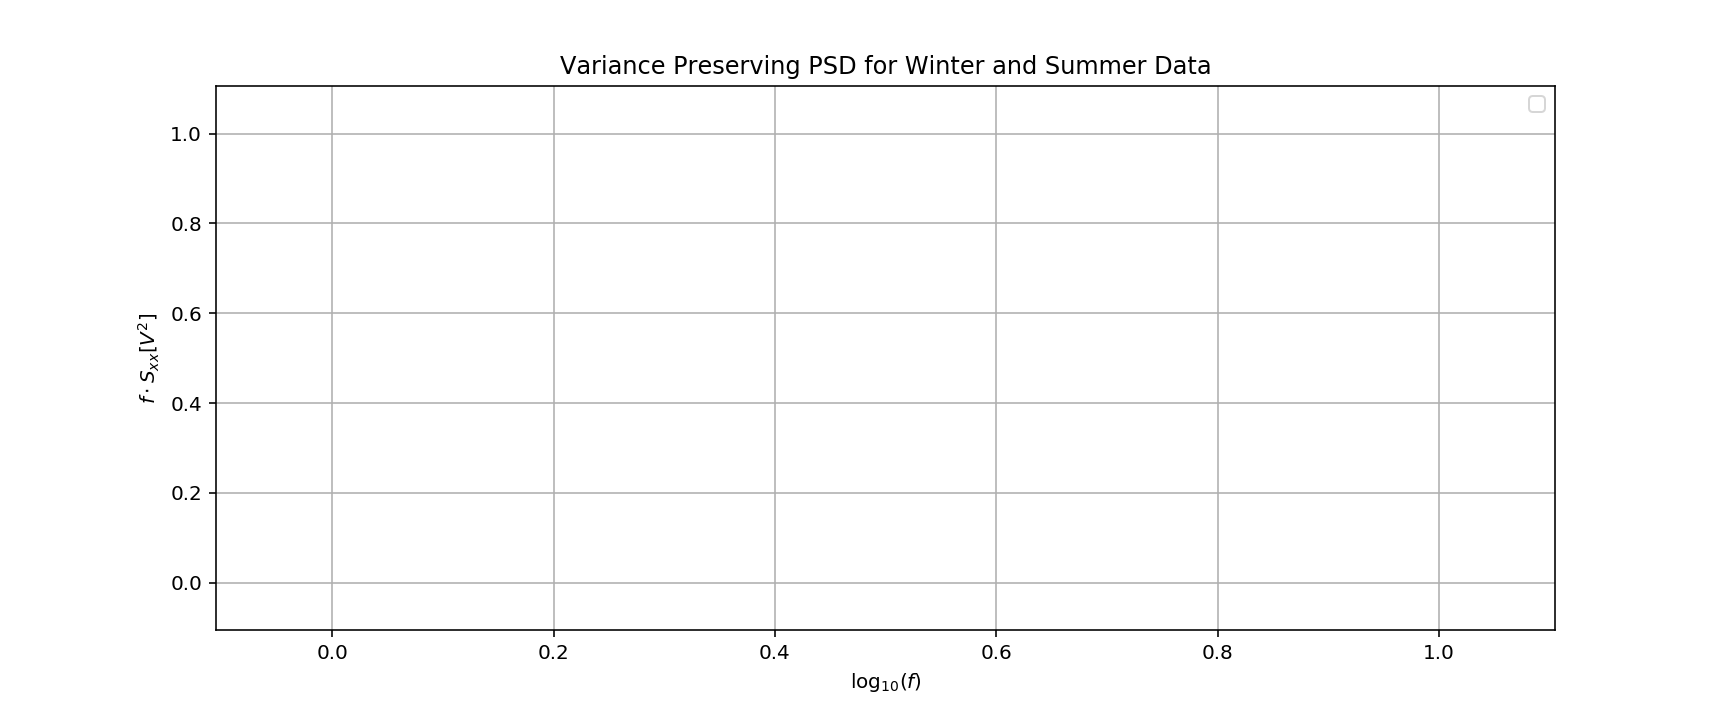

No handles with labels found to put in legend.


In [20]:
#Plotting variance-preserving form for summer and winter PSD
fig, ax = plt.subplots(1, 1, figsize=(10,5))
ax.plot(np.log10(freq1),freq1*xi,color='b',label='Winter Data') #Using winter psd
ax.plot(np.log10(freq2),freq2*xii,color='r', label='Summer Data') #Using summer psd
ax.set_title('PSD for Winter and Summer (variance-preserving)')
ax.set_ylabel('$S_{xx}$')
ax.set_xlabel('log10(frequency)')
ax.grid()
ax.legend()
plt.show()

**Derive (i.e. give theoretical explanation) why this form is "variance preserving"**

This is "variance preserving" because when we integrate *fSxx(f)d(logf)* from lower limit "a" to upper limit "b", we get the same integral that we started with because of the proportionality of the derivative of log10(x) to 1/x 

**What new insight (if any) did you gain regarding the physical processes affecting the air temperature in Victoria?**

The larger frequency peak is found to be at f = 1/2 which is the day-night frequency. This frequency has large amounts of energy because the Earth's rotation around the Sun drives this. So we can conclude that the summer season has higher energies. On the contrart, in winter, the energy shift is slightly less than that of summer, but that is because the ground is already cool/cold enough, so when there is no sunlight, the temperature does not get affected by a big amount. During the day, one can see that there are no noticable variations in temperature, due to the fact that there are no peaks after the 10E-6 Hz frequency.

**QUESTION 2**

In [ ]:
#Reading longitude and latitude values from all stations
alllonglat = np.genfromtxt('AllStations_temperature_h_2019.dat', delimiter=" ", max_rows=2)
longvals = alllonglat[0][~np.isnan(alllonglat[0])]
latvals = alllonglat[1][~np.isnan(alllonglat[1])]

indices = list(zip(longvals,latvals))
indices.insert(0, "time")

#Reading UVic science station file
df = pd.read_csv('UVicSci_temperature_2019.dat', sep='\s+', skiprows=[0,1], names=indices, index_col = 'time')
df.head()

#Choosing the UVic science station
longstn = 236.691
latstn = 48.462
longdiff = abs(longvals - longstn)
latdiff = abs(latvals - latstn)
stnumm = list(longdiff + latdiff).index(min(longdiff + latdiff))

df = df.iloc[:,stnumm]

deltat = 14.4 #In hours ; 0.6 day

startdate = pd.Timestamp(year=2018,month=1,day=1,hour=0)
enddate   = pd.Timestamp(year=2018,month=12,day=31,hour=0)

**QUESTION 3**

In [29]:
T=1 #Set T=1

#Defining coefficients for the Fourier series
def a(n):
    return 0

def b(n):
    return (2/(n*np.pi))*(((-1)**n)-1)

#Define a function to get the Fourier series
def calcFT(x,n,a,b):
    fourier = 0
    for i in range(1,n+1):
        fourier = fourier + a(i)*np.cos(2*i*np.pi/T) + b(i)*np.sin(2*i*np.pi*x/T)
        return fourier

deltat = T/200 #Sampling rate
x = np.arange(-3*T/2,3*T/2,deltat) #Defining x where -3*T/2 and 3*T/2 are the x limits
FTterms = [1,2,5,10,100] #The required Fourier series terms

<IPython.core.display.Javascript object>


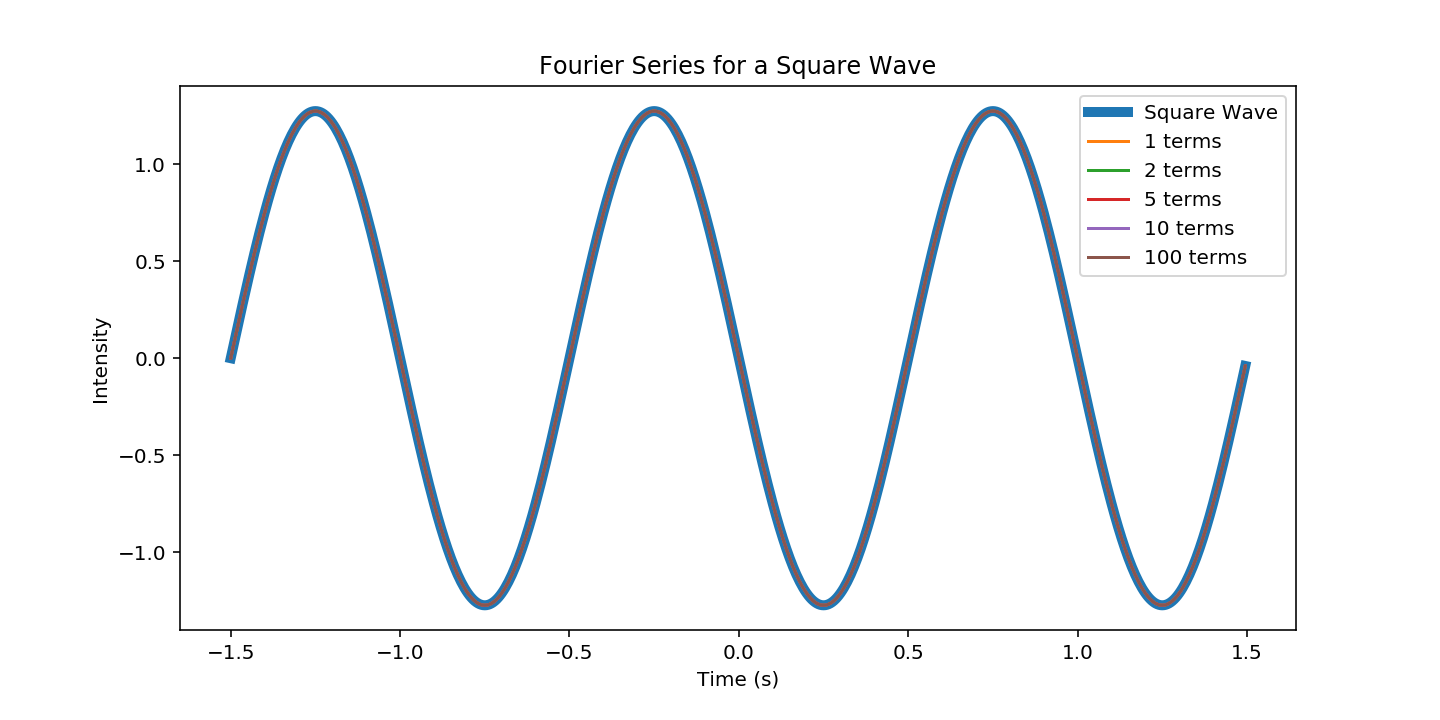

In [30]:
fourierdat = []
for i in FTterms: #Using a for loop to append to the fouriers variable
    fourierdat.append(calcFT(x,i,a,b))

#Plotting the Fourier series of a square wave
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(x,calcFT(x,10000,a,b),lw=5,label='Square Wave')

for term, fourier in zip(FTterms,fourierdat):
    ax.plot(x, fourier, label='{} terms'.format(term))

ax.set_title('Fourier Series for a Square Wave')
ax.set_ylabel('Intensity')
ax.set_xlabel('Time (s)')
ax.legend(loc='best')
plt.show()

In [32]:
dt = T/200  #Re-writing delta t
x = np.arange(0,T*100,dt) #Same x variable introduced
N = len(x)
FTterms = [1,2,5,10,100]
fourierdat = []

for i in FTterms:
    fourierdat.append(calcFT(x,i,a,b))

In [33]:
fourierdat5 = fouriers[2]
fourierdat100 = fouriers[4] 
x100 = np.fft.fft(fourierdat100) #Getting the 100 terms of the Fourier series
x5 = np.fft.fft(fourierdat5) #Getting the 5 terms of the Fourier series
ii1 = range(0,int(N/2))
ii2 = range(0,int(N/2))

freq1 = np.arange(0,int(N/2),1)/(N*dt) #Frequency of first signal
powerspec1 = np.abs(x100[ii1])**2 / (N/2) #Take absolute value
freq2 = np.arange(0,int(N/2),1)/(N*dt) #Frequency of second signal
powerspec2 = np.abs(x5[ii2])**2/(N/2) #Take absolute value

<IPython.core.display.Javascript object>


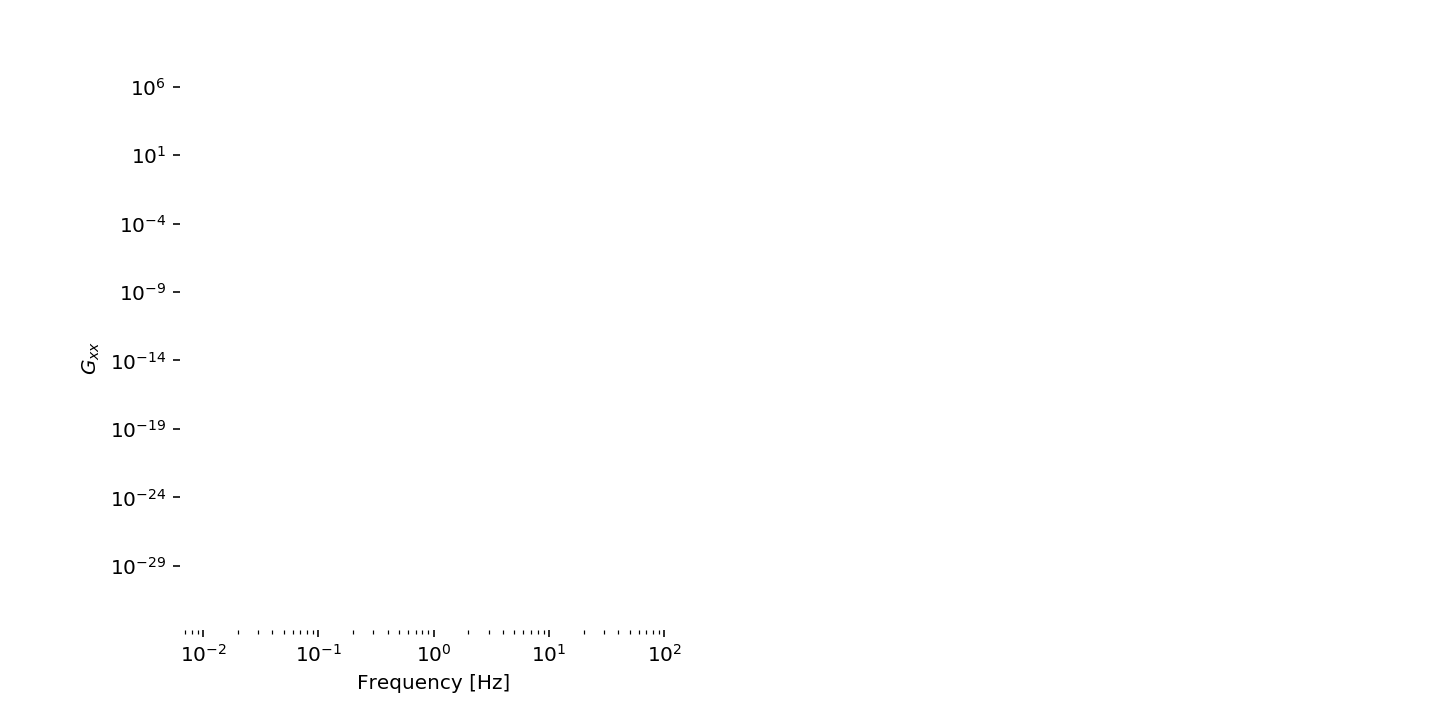

In [34]:
fig, axes = plt.subplots(1,2,figsize=(10,5)) #Plotting the power spectrum
axes[0].loglog(freq1,powerspec1,color='o')
axes[1].loglog(freq2,powerspec2,color='g')
axes[0].set_title("Power Spectrum of 100 Terms")
axes[0].set_ylabel("$G_{xx}$")
axes[0].set_xlabel('Frequency [Hz]')
axes[1].set_title("Power Spectrum of 5 Terms")
axes[1].set_xlabel('Frequency [Hz]')
plt.show()